In [ ]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pickle
import warnings
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")


        
        




In [3]:
def tranform_image(img):
    feature = []
    tranform_img = resize(img, (150, 150, 3))
    flatten_img = tranform_img.flatten()
    feature.append(flatten_img)
    return np.array(feature)

In [5]:
class Get_Model:
    def __init__(self, dir_, file_name):
        self.dir_ = dir_
        self.file_name = file_name

    def get_data(self):
        images = os.listdir(self.dir_)
        X = np.array([tranform_image(imread(os.path.join(self.dir_, img))) for img in images])
        X = np.squeeze(X)
        y = [int(img.split('-')[0].replace('img', '')) for img in images]
        return X, y

    def build_model(self):
        X, y = self.get_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        print(f'Accuracy: {accuracy}')
        print(f'F1 Score: {f1}')
        print(f'Recall: {recall}')
        print(f'Precision: {precision}')
        print(f'Confusion Matrix:\n{conf_matrix}')
        
        pickle.dump(model, open('Models/' + self.file_name + '.pkl', 'wb'), fix_imports=True)
        
        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.savefig(f'Models/{self.file_name}_conf_matrix.png')
        
        return accuracy, f1, recall, precision, conf_matrix

Accuracy: 0.3387096774193548
F1 Score: 0.3594411860540893
Recall: 0.3387096774193548
Precision: 0.4086405529953917
Confusion Matrix:
[[1 1 0 0 1 1 0 0 0 1 1 0 0]
 [1 2 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 2 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 2 0 2 1 0 1 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 1 1 1 0 0]
 [0 0 0 1 0 1 0 4 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 2 0 0]
 [0 0 0 1 1 0 0 0 1 0 2 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0]
 [1 0 2 0 0 0 0 0 0 0 1 1 2]
 [0 1 0 0 0 0 0 0 0 0 0 1 0]]


(0.3387096774193548,
 0.3594411860540893,
 0.3387096774193548,
 0.4086405529953917,
 array([[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
        [1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 4, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64))

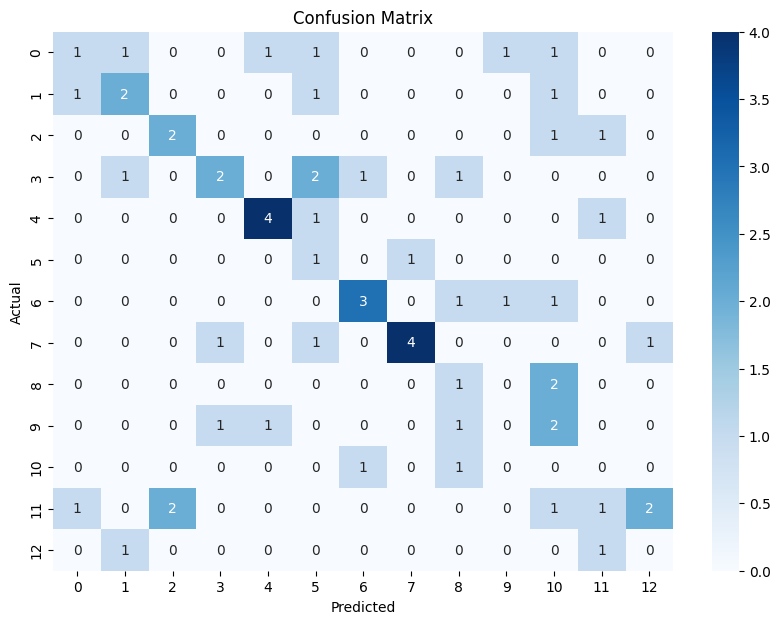

In [6]:
o = Get_Model("test_img_aa/", "KCRaa")
o.build_model()




Accuracy: 0.17647058823529413
F1 Score: 0.16468720821661997
Recall: 0.17647058823529413
Precision: 0.1723529411764706
Confusion Matrix:
[[0 2 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0]
 [1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0]
 [1 1 0 5 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 0 0]
 [0 0 0 0 0 1 0 0 2 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 0]
 [0 0 0 1 0 0 0 0 0 2 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 2 0 0 0 0 0 1 0 1 0 0 0 2]]


(0.17647058823529413,
 0.16468720821661997,
 0.17647058823529413,
 0.1723529411764706,
 array([[0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0]

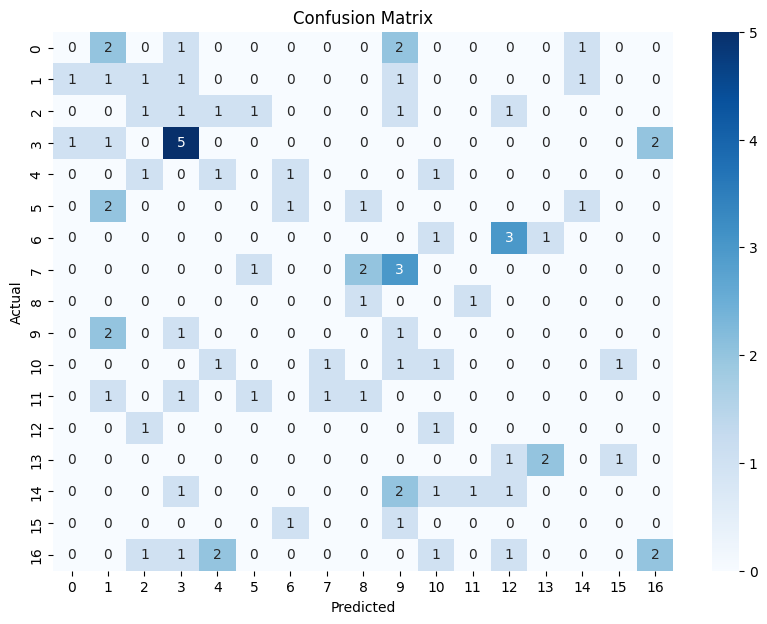

In [7]:

o = Get_Model("test_img_ka/", "KCRkaa")
o.build_model()

Accuracy: 0.5294117647058824
F1 Score: 0.5430252753782165
Recall: 0.5294117647058824
Precision: 0.6129785247432307
Confusion Matrix:
[[3 2 0 0 0 0 1 1 1 0]
 [0 4 0 0 0 0 0 0 0 1]
 [1 0 3 1 0 0 0 0 0 0]
 [0 0 0 2 1 0 1 0 0 1]
 [0 0 0 0 4 0 1 1 0 0]
 [0 0 0 0 1 2 0 0 0 0]
 [0 0 0 0 0 0 2 1 0 1]
 [0 1 0 0 0 0 2 3 0 1]
 [0 0 0 0 0 0 1 0 2 1]
 [0 0 0 0 1 0 0 0 1 2]]


(0.5294117647058824,
 0.5430252753782165,
 0.5294117647058824,
 0.6129785247432307,
 array([[3, 2, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 4, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 3, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 1, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 4, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 1, 0, 1],
        [0, 1, 0, 0, 0, 0, 2, 3, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 2, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 2]], dtype=int64))

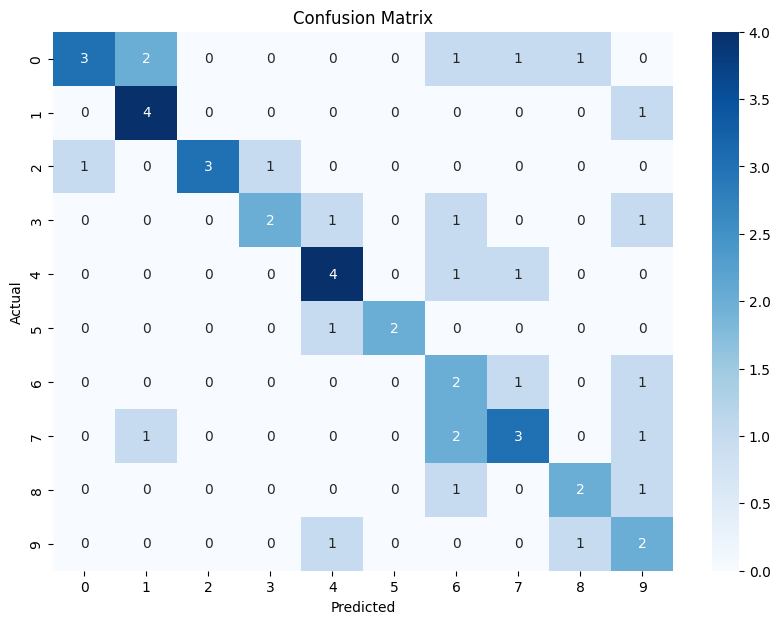

In [8]:

o = Get_Model("test_img_num/", "KCRnum")
o.build_model()